In [1]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.0 MB/s eta 0:00:00


# LIBRARIES

In [2]:
import numpy as np
from tqdm import tqdm
import wandb
import matplotlib.pyplot as plt
import copy
from keras.datasets import fashion_mnist
from keras.datasets import mnist
import seaborn as sns

# SPLITTING DATA

In [3]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# CLASS FOR DATA VISUALISATION

In [7]:
def all_classes():
    i=0
    arr=[]
    j=0
    class_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat',   #classes
                  'Sandal','Shirt','Sneaker','Bag','Ankle boot']

    class_remaning=list(range(0,10))
    while len(class_remaning):
        if y_train[i] ==j :
            class_remaning.remove(j)
            plt.figure(figsize=(5, 5)) #will plot 10x10 inches figure
            plt.yticks([])
            plt.imshow(x_train[i],cmap='gray')
            plt.grid(False)
            plt.xticks([]) #remove x axis tick lines
            plt.title('Class'+str(class_names[j]))
            plt.show()
            arr.append(np.expand_dims(x_train[i],axis=-1))
            j+=1
        i+=1
    return arr, class_names

# WANDB LOGIN

In [8]:
wandb.login(key='5157ae11e5d243722bc57912a56718dc8ef2f734')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

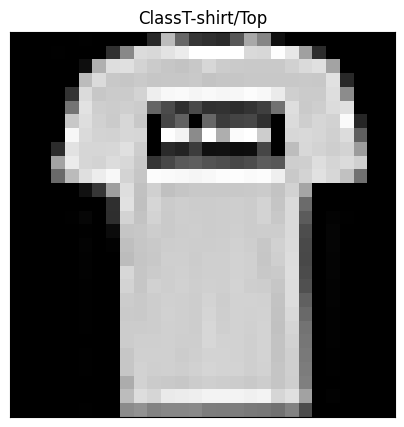

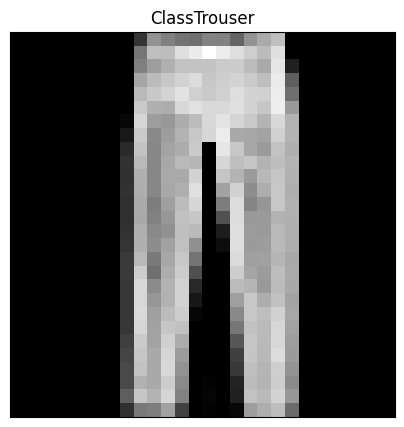

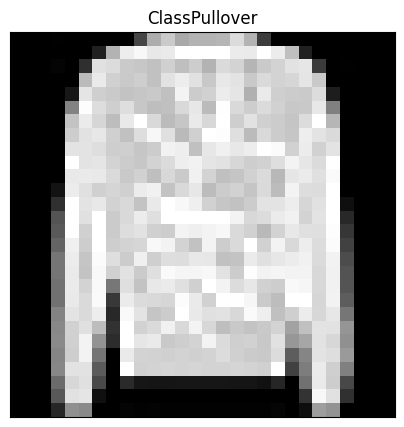

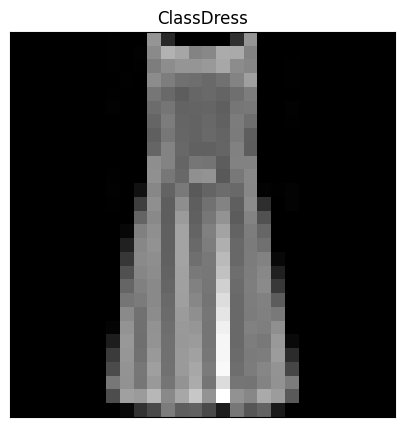

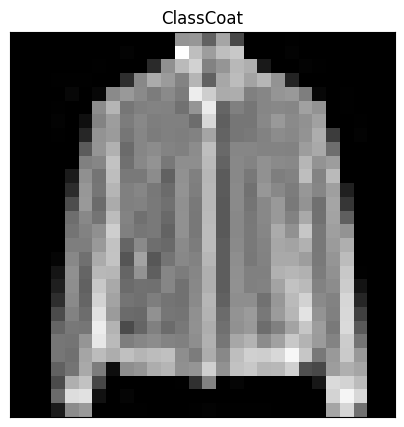

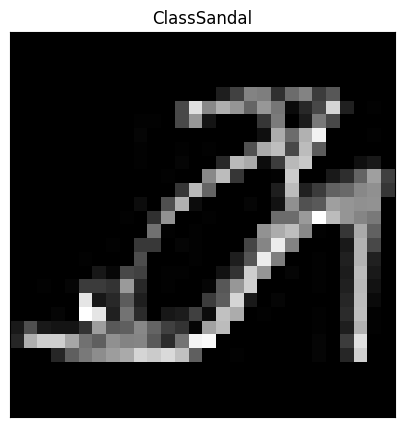

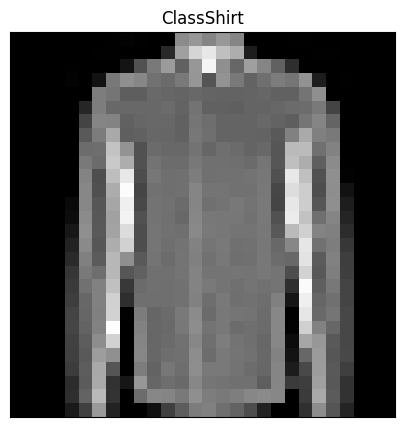

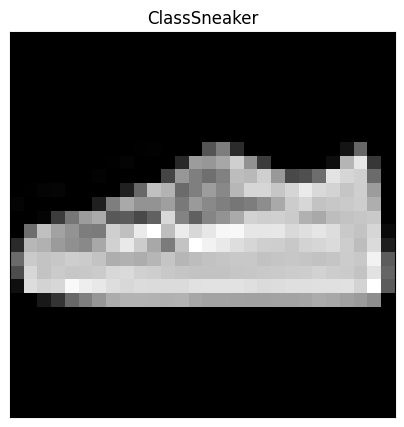

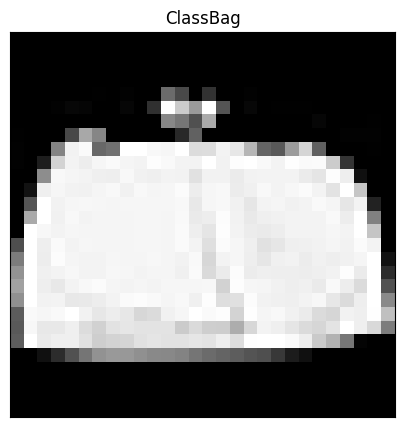

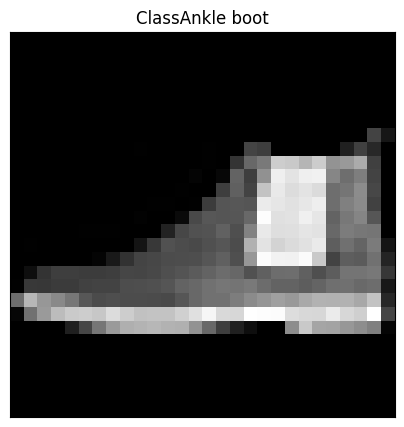

In [9]:
image_array , label_array = all_classes()
wandb.init(project="CS23M013_DL_A1",id="question 1")
i=0
while i<10:
    images = wandb.Image(image_array[i], caption=label_array[i])
    wandb.log({"Fashion_MNIST": images})
    i+=1
wandb.run.finish()